In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mat
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

df=pd.read_csv('results.csv')
'''
This dataset has exam marks for 1000 students in six subjects with three extra columns - total marks, result and division.
Result can be passed 1 or failed 0. Division can be 0, 1, 2, and 3. This data set can be uses for binary classification and multi class classification. 
'''

'\nThis dataset has exam marks for 1000 students in six subjects with three extra columns - total marks, result and division.\nResult can be passed 1 or failed 0. Division can be 0, 1, 2, and 3. This data set can be uses for binary classification and multi class classification. \n'

In [2]:
df.head()

,Unnamed: 0,Hindi,English,Science,Maths,History,Geograpgy,Total,Results,Div
0,0,65,10,59,3,71,37,245,0,3
1,1,94,56,4,67,91,50,362,1,1
2,2,7,85,76,99,60,25,352,0,2
3,3,88,46,59,94,52,38,377,1,1
4,4,39,81,37,38,6,54,255,1,3


In [3]:
df.isna().sum()

Unnamed: 0    0
Hindi         0
English       0
Science       0
Maths         0
History       0
Geograpgy     0
Total         0
Results       0
Div           0
dtype: int64

In [4]:
df.rename(columns={"Unnamed: 0":"Sr. No."},inplace=True)
df.head()

,Sr. No.,Hindi,English,Science,Maths,History,Geograpgy,Total,Results,Div
0,0,65,10,59,3,71,37,245,0,3
1,1,94,56,4,67,91,50,362,1,1
2,2,7,85,76,99,60,25,352,0,2
3,3,88,46,59,94,52,38,377,1,1
4,4,39,81,37,38,6,54,255,1,3


In [5]:
df.describe()

,Sr. No.,Hindi,English,Science,Maths,History,Geograpgy,Total,Results,Div
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,51.645000,50.110000,49.440000,49.553000,49.03400,50.028000,299.810000,0.350000,1.856000
std,288.819436,29.471912,28.048505,28.921114,28.632447,28.76975,28.710268,71.865239,0.477208,0.904479
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,103.000000,0.000000,0.000000
25%,249.750000,26.000000,26.000000,25.000000,25.750000,24.00000,26.000000,254.000000,0.000000,1.000000
50%,499.500000,53.000000,50.500000,50.000000,49.000000,49.00000,49.000000,296.000000,0.000000,2.000000
75%,749.250000,77.000000,75.000000,73.250000,74.000000,73.25000,75.000000,349.250000,1.000000,3.000000
max,999.000000,99.000000,99.000000,99.000000,99.000000,99.00000,99.000000,505.000000,1.000000,3.000000


In [6]:
df.dtypes

Sr. No.      int64
Hindi        int64
English      int64
Science      int64
Maths        int64
History      int64
Geograpgy    int64
Total        int64
Results      int64
Div          int64
dtype: object

In [7]:
df.isnull()

,Sr. No.,Hindi,English,Science,Maths,History,Geograpgy,Total,Results,Div
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False


In [8]:
df.shape

(1000, 10)

In [9]:
df.size

10000

In [10]:
print(df.isna())

     Sr. No.  Hindi  English  Science  Maths  History  Geograpgy  Total  \
0      False  False    False    False  False    False      False  False   
1      False  False    False    False  False    False      False  False   
2      False  False    False    False  False    False      False  False   
3      False  False    False    False  False    False      False  False   
4      False  False    False    False  False    False      False  False   
..       ...    ...      ...      ...    ...      ...        ...    ...   
995    False  False    False    False  False    False      False  False   
996    False  False    False    False  False    False      False  False   
997    False  False    False    False  False    False      False  False   
998    False  False    False    False  False    False      False  False   
999    False  False    False    False  False    False      False  False   

     Results    Div  
0      False  False  
1      False  False  
2      False  False  
3      Fals

In [11]:
print(df.duplicated().sum())

0


In [12]:
df.rename(columns={"Geograpgy":"Geography"},inplace=True)
df.rename(columns={"Total":"Total_Marks"},inplace=True)
df.rename(columns={"Div":"Distinction"},inplace=True)

In [13]:
df.tail()

,Sr. No.,Hindi,English,Science,Maths,History,Geography,Total_Marks,Results,Distinction
995,995,55,89,68,58,13,13,296,0,2
996,996,42,62,25,87,51,68,335,1,2
997,997,9,83,70,14,11,78,265,0,3
998,998,23,82,31,42,84,52,314,0,2
999,999,75,78,68,33,79,91,424,1,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Sr. No.      1000 non-null   int64
 1   Hindi        1000 non-null   int64
 2   English      1000 non-null   int64
 3   Science      1000 non-null   int64
 4   Maths        1000 non-null   int64
 5   History      1000 non-null   int64
 6   Geography    1000 non-null   int64
 7   Total_Marks  1000 non-null   int64
 8   Results      1000 non-null   int64
 9   Distinction  1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


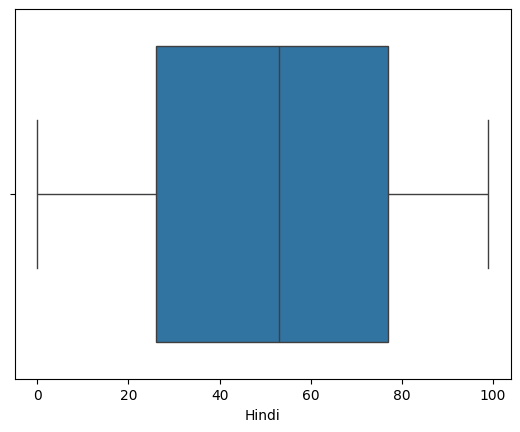

51.645

In [15]:
sns.boxplot(x=df['Hindi'])
mat.show()
df['Hindi'].mean()

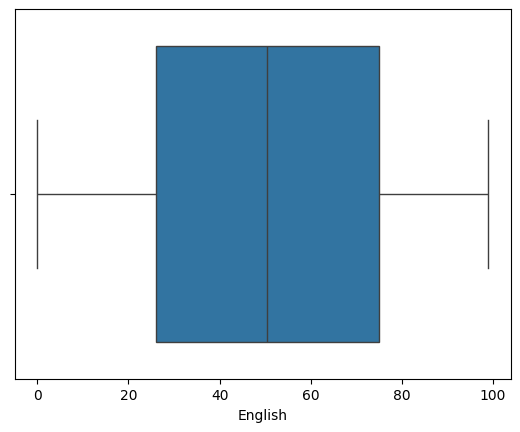

50.11


In [16]:
sns.boxplot(x=df['English'])
mat.show()
print(df['English'].mean())

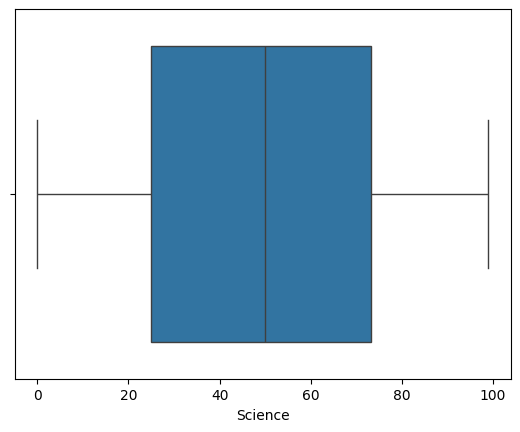

49.44

In [17]:
sns.boxplot(x=df['Science'])
mat.show()
df['Science'].mean()

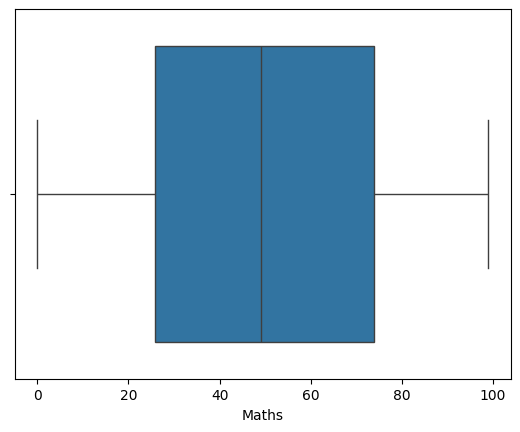

49.553

In [18]:
sns.boxplot(x=df['Maths'])
mat.show()
df['Maths'].mean()

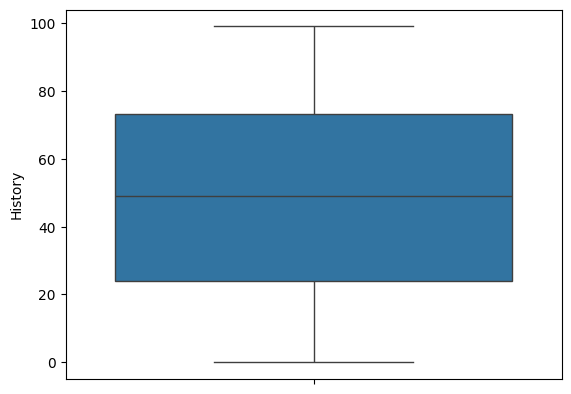

49.034

In [19]:
sns.boxplot(y=df['History'])
mat.show()
df['History'].mean()

In [20]:
df.dtypes

Sr. No.        int64
Hindi          int64
English        int64
Science        int64
Maths          int64
History        int64
Geography      int64
Total_Marks    int64
Results        int64
Distinction    int64
dtype: object

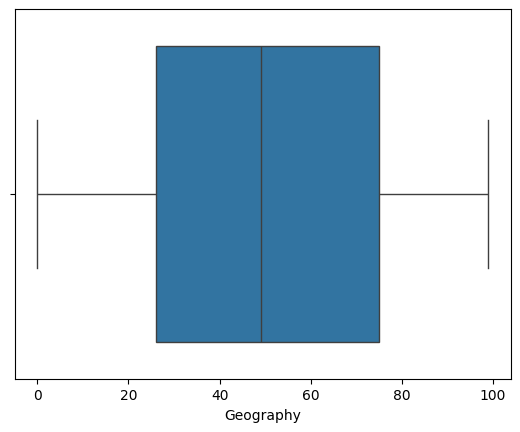

50.028

In [21]:
sns.boxplot(x=df['Geography'])
mat.show()
df['Geography'].mean()

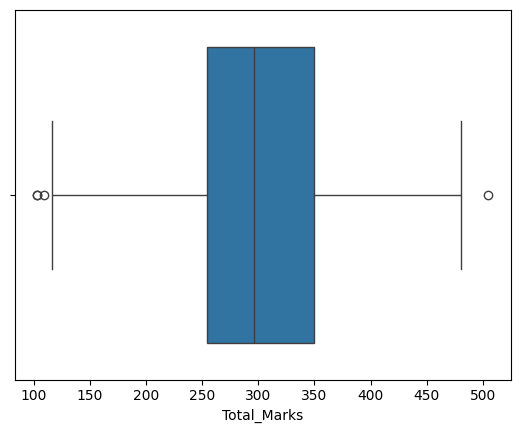

299.81

In [22]:
sns.boxplot(x=df['Total_Marks'])
mat.show()
df['Total_Marks'].mean()

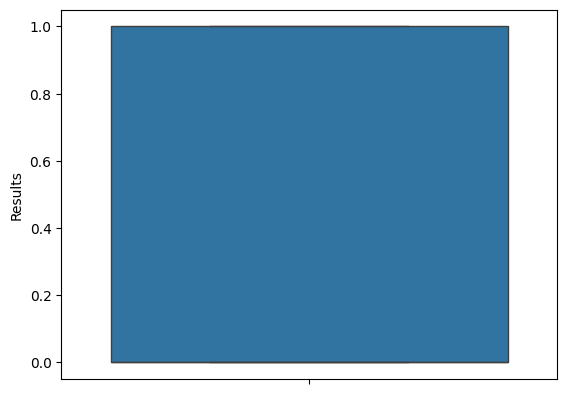

0.35

In [23]:
sns.boxplot(y=df['Results'])
mat.show()
df['Results'].mean()

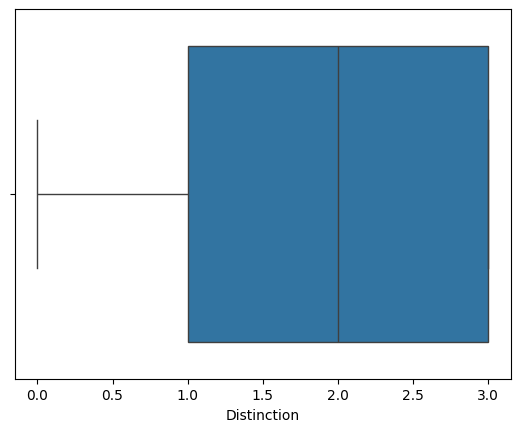

1.856

In [24]:
sns.boxplot(x=df['Distinction'])
mat.show()
df['Distinction'].mean()

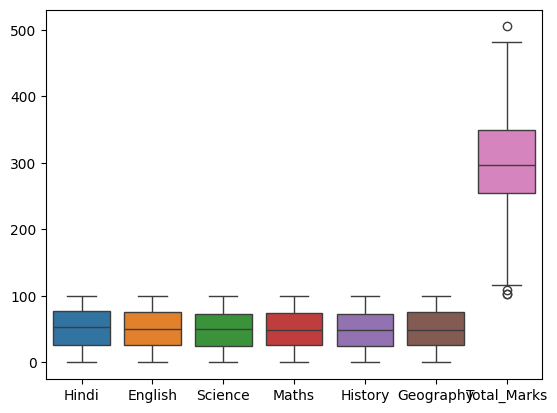

In [25]:
numeric_cols = ['Hindi', 'English', 'Science', 'Maths', 'History', 'Geography', 'Total_Marks']
sns.boxplot(data=df[numeric_cols])
mat.show()

In [26]:
Q1 = df['Total_Marks'].quantile(0.25)
Q3 = df['Total_Marks'].quantile(0.75)
IQR = Q3 - Q1

In [27]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [28]:
df_filtered = df[(df['Total_Marks'] >= lower_bound) & (df['Total_Marks'] <= upper_bound)]

In [29]:
outliers_removed = len(df) - len(df_filtered)
print("Number of outliers removed:", outliers_removed)

Number of outliers removed: 4


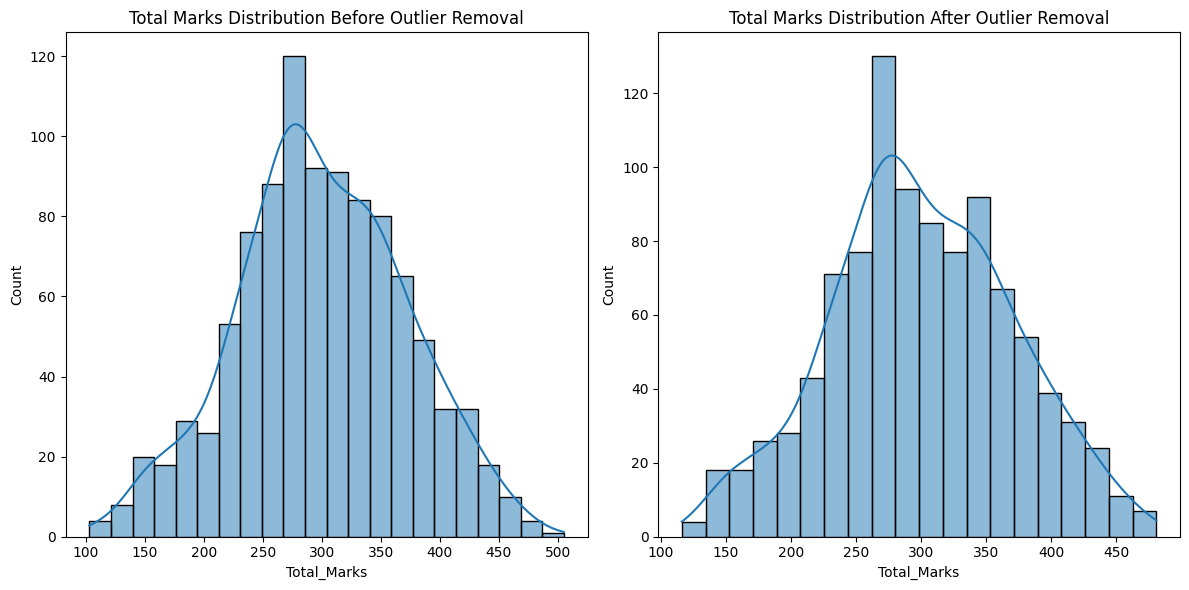

In [30]:
mat.figure(figsize=(12, 6))
mat.subplot(1, 2, 1)
sns.histplot(df['Total_Marks'], kde=True)
mat.title('Total Marks Distribution Before Outlier Removal')


mat.subplot(1, 2, 2)
sns.histplot(df_filtered['Total_Marks'], kde=True)
mat.title('Total Marks Distribution After Outlier Removal')

mat.tight_layout()
mat.show()

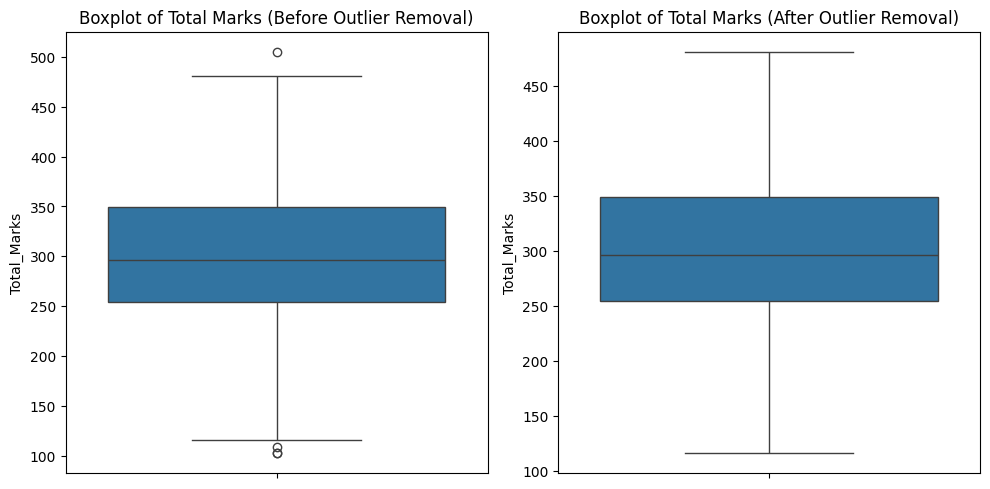

In [31]:

mat.figure(figsize=(10, 5))
mat.subplot(1, 2, 1)
sns.boxplot(y=df['Total_Marks'])
mat.title('Boxplot of Total Marks (Before Outlier Removal)')

mat.subplot(1, 2, 2)
sns.boxplot(y=df_filtered['Total_Marks'])
mat.title('Boxplot of Total Marks (After Outlier Removal)')

mat.tight_layout()
mat.show()

In [32]:
df_filtered.loc[:, 'Total_sqrt'] = np.sqrt(df_filtered['Total_Marks'])

C:\Users\Ayush\AppData\Local\Temp\ipykernel_16540\1810586792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'Total_sqrt'] = np.sqrt(df_filtered['Total_Marks'])


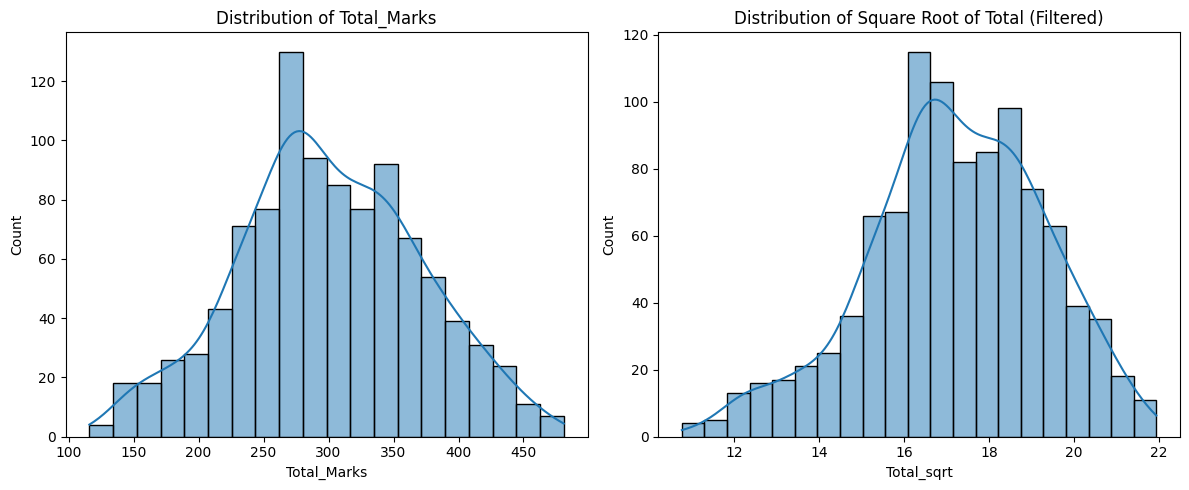

In [33]:
mat.figure(figsize=(12, 5))
mat.subplot(1, 2, 1)
sns.histplot(df_filtered['Total_Marks'], kde=True)
mat.title('Distribution of Total_Marks')
mat.subplot(1, 2, 2)
sns.histplot(df_filtered['Total_sqrt'], kde=True)
mat.title('Distribution of Square Root of Total (Filtered)')
mat.tight_layout()
mat.show()

In [37]:
scaler = MinMaxScaler()
total_marks_reshaped = df_filtered['Total_Marks'].values.reshape(-1, 1)
total_marks_scaled = scaler.fit_transform(total_marks_reshaped)
df_filtered.loc[:,'Total_Marks_scaled'] = total_marks_scaled
print("Minimum value of scaled Total_Marks:", df_filtered['Total_Marks_scaled'].min())
print("Maximum value of scaled Total_Marks:", df_filtered['Total_Marks_scaled'].max())

Minimum value of scaled Total_Marks: 0.0
Maximum value of scaled Total_Marks: 1.0


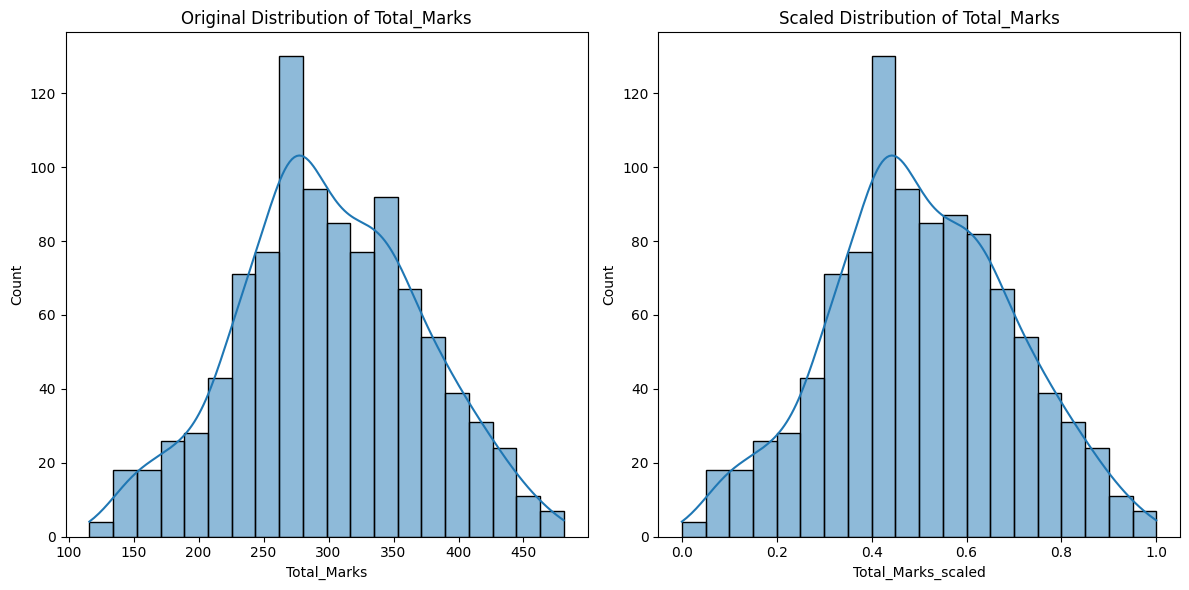

In [35]:
mat.figure(figsize=(12, 6))
# Original distribution of 'Total_Marks'
mat.subplot(1, 2, 1)
sns.histplot(df_filtered['Total_Marks'], kde=True)
mat.title('Original Distribution of Total_Marks')

# Scaled distribution of 'Total_Marks'
mat.subplot(1, 2, 2)
sns.histplot(df_filtered['Total_Marks_scaled'], kde=True)
mat.title('Scaled Distribution of Total_Marks')

mat.tight_layout()
mat.show()

In [36]:
df_filtered

,Sr. No.,Hindi,English,Science,Maths,History,Geography,Total_Marks,Results,Distinction,Total_sqrt,Total_Marks_scaled
0,0,65,10,59,3,71,37,245,0,3,15.652476,0.353425
1,1,94,56,4,67,91,50,362,1,1,19.026298,0.673973
2,2,7,85,76,99,60,25,352,0,2,18.761663,0.646575
3,3,88,46,59,94,52,38,377,1,1,19.416488,0.715068
4,4,39,81,37,38,6,54,255,1,3,15.968719,0.380822
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,55,89,68,58,13,13,296,0,2,17.204651,0.493151
996,996,42,62,25,87,51,68,335,1,2,18.303005,0.600000
997,997,9,83,70,14,11,78,265,0,3,16.278821,0.408219
998,998,23,82,31,42,84,52,314,0,2,17.720045,0.542466
